In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np

items =  pd.read_csv('/content/drive/MyDrive/Datasets/Items.csv')
rev =  pd.read_csv('/content/drive/MyDrive/Datasets/Reviews.csv')
items.info()
items.shape
items.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 720 entries, 0 to 719
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   asin           720 non-null    object 
 1   brand          716 non-null    object 
 2   title          720 non-null    object 
 3   url            720 non-null    object 
 4   image          720 non-null    object 
 5   rating         720 non-null    float64
 6   reviewUrl      720 non-null    object 
 7   totalReviews   720 non-null    int64  
 8   price          720 non-null    float64
 9   originalPrice  720 non-null    float64
dtypes: float64(3), int64(1), object(6)
memory usage: 56.4+ KB


,asin,brand,title,url,image,rating,reviewUrl,totalReviews,price,originalPrice
0,B0000SX2UC,NaN,Dual-Band / Tri-Mode Sprint PCS Phone w/ Voice...,https://www.amazon.com/Dual-Band-Tri-Mode-Acti...,https://m.media-amazon.com/images/I/2143EBQ210...,3.0,https://www.amazon.com/product-reviews/B0000SX2UC,14,0.00,0.0
1,B0009N5L7K,Motorola,Motorola I265 phone,https://www.amazon.com/Motorola-i265-I265-phon...,https://m.media-amazon.com/images/I/419WBAVDAR...,3.0,https://www.amazon.com/product-reviews/B0009N5L7K,7,49.95,0.0
2,B000SKTZ0S,Motorola,MOTOROLA C168i AT&T CINGULAR PREPAID GOPHONE C...,https://www.amazon.com/MOTOROLA-C168i-CINGULAR...,https://m.media-amazon.com/images/I/71b+q3ydkI...,2.7,https://www.amazon.com/product-reviews/B000SKTZ0S,22,99.99,0.0
3,B001AO4OUC,Motorola,Motorola i335 Cell Phone Boost Mobile,https://www.amazon.com/Motorola-i335-Phone-Boo...,https://m.media-amazon.com/images/I/710UO8gdT+...,3.3,https://www.amazon.com/product-reviews/B001AO4OUC,21,0.00,0.0
4,B001DCJAJG,Motorola,Motorola V365 no contract cellular phone AT&T,https://www.amazon.com/Motorola-V365-contract-...,https://m.media-amazon.com/images/I/61LYNCVrrK...,3.1,https://www.amazon.com/product-reviews/B001DCJAJG,12,149.99,0.0


In [3]:
#DATA CLEANING AND PREPARATION/PREPROCESSING

items.drop(columns=['originalPrice', 'reviewUrl', 'url', 'image'], axis=1, inplace=True)
items.columns

Index(['asin', 'brand', 'title', 'rating', 'totalReviews', 'price'], dtype='object')

In [4]:
items.isna().sum()

asin            0
brand           4
title           0
rating          0
totalReviews    0
price           0
dtype: int64

In [5]:
col = items[items['brand'].isna() == True]
print(col)
lst = list(col['asin'])
print(lst)
print(col['title'])

           asin brand                                              title  \
0    B0000SX2UC   NaN  Dual-Band / Tri-Mode Sprint PCS Phone w/ Voice...   
144  B01EWKHIAI   NaN  Microsoft Lumia 950 32GB Dual Sim NAM RM-1118 ...   
471  B07JHXX5YR   NaN  ROG Phone Gaming Smartphone ZS600KL-S845-8G512...   
631  B07T3KMJW8   NaN                           Redmi 7A 2+16Gb Black EU   

     rating  totalReviews   price  
0       3.0            14    0.00  
144     3.9            67  242.99  
471     3.9           126  549.00  
631     3.8             5   99.99  
['B0000SX2UC', 'B01EWKHIAI', 'B07JHXX5YR', 'B07T3KMJW8']
0      Dual-Band / Tri-Mode Sprint PCS Phone w/ Voice...
144    Microsoft Lumia 950 32GB Dual Sim NAM RM-1118 ...
471    ROG Phone Gaming Smartphone ZS600KL-S845-8G512...
631                             Redmi 7A 2+16Gb Black EU
Name: title, dtype: object


In [6]:
rows = rev[rev['asin'].isin(lst)]
rows.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 0 to 64039
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   asin          200 non-null    object 
 1   name          200 non-null    object 
 2   rating        200 non-null    int64  
 3   date          200 non-null    object 
 4   verified      200 non-null    bool   
 5   title         200 non-null    object 
 6   body          200 non-null    object 
 7   helpfulVotes  135 non-null    float64
dtypes: bool(1), float64(1), int64(1), object(5)
memory usage: 12.7+ KB


In [7]:
items.drop(col.index, axis=0, inplace=True)
items.shape

(716, 6)

In [8]:
df = items[items['price'] == 0]
df

,asin,brand,title,rating,totalReviews,price
3,B001AO4OUC,Motorola,Motorola i335 Cell Phone Boost Mobile,3.3,21,0.0
5,B001GQ3DJM,Nokia,Nokia 1680 Black Phone (T-Mobile),2.7,3,0.0
6,B0029F2O3A,Samsung,"Samsung Alias2 U750 Phone, Black (Verizon Wire...",3.0,29,0.0
7,B002AS9WEA,Samsung,Samsung a167 Prepaid GoPhone (AT&T),2.9,18,0.0
8,B002UHS0UI,Motorola,Verizon Wireless Motorola RAZR V3m - Silver,2.7,208,0.0
...,...,...,...,...,...,...
597,B07RCXCPV5,OnePlus,OnePlus 7 Pro Dual Sim Factory Unlocked GM1917...,4.4,49,0.0
602,B07RJZH9N2,Samsung,"Samsung Galaxy A50 (64GB, 4GB RAM) 6.4"" Displa...",4.1,21,0.0
607,B07RSYRG3R,Motorola,Motorola Z3 Play - 32GB - Unlocked (AT&T/Sprin...,3.7,10,0.0
610,B07RZ8QFV1,Samsung,Samsung Galaxy Note 9 N960U 128GB T-Mobile GSM...,4.5,9,0.0


In [9]:
brand = list(df['brand'].unique()) 
for i in brand:
    pr = items[items['brand'] == i].price.mean()
    items.at[df[df['brand'] == i].index,'price'] = pr

df = items[items['price'] == 0]
df

,asin,brand,title,rating,totalReviews,price


In [10]:
items
items.isna().sum()

asin            0
brand           0
title           0
rating          0
totalReviews    0
price           0
dtype: int64

In [11]:
rev.isna().sum()

asin                0
name                2
rating              0
date                0
verified            0
title              14
body               21
helpfulVotes    40771
dtype: int64

In [12]:
rev.drop(columns=['helpfulVotes'], axis=1, inplace=True)
rev.drop(rows.index, axis=0, inplace=True)

In [13]:
rev.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 67786 entries, 14 to 67985
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   asin      67786 non-null  object
 1   name      67784 non-null  object
 2   rating    67786 non-null  int64 
 3   date      67786 non-null  object
 4   verified  67786 non-null  bool  
 5   title     67772 non-null  object
 6   body      67765 non-null  object
dtypes: bool(1), int64(1), object(5)
memory usage: 3.7+ MB


In [14]:
rev['date'] = pd.to_datetime(rev['date']).dt.date

In [15]:
rev

,asin,name,rating,date,verified,title,body
14,B0009N5L7K,Marcel Thomas,1,2016-03-05,True,Stupid phone,DON'T BUY OUT OF SERVICE
15,B0009N5L7K,William B.,4,2006-02-09,False,Exellent Service,I have been with nextel for nearly a year now ...
16,B0009N5L7K,K. Mcilhargey,5,2006-02-07,False,I love it,"I just got it and have to say its easy to use,..."
17,B0009N5L7K,Stephen Cahill,1,2016-12-20,True,Phones locked,1 star because the phones locked so I have to ...
18,B0009N5L7K,Mihir,5,2009-12-13,True,Excellent product,The product has been very good. I had used thi...
...,...,...,...,...,...,...,...
67981,B081H6STQQ,jande,5,2019-08-16,False,"Awesome Phone, but finger scanner is a big mis...",I love the camera on this phone. The screen is...
67982,B081H6STQQ,2cool4u,5,2019-09-14,False,Simply Amazing!,I've been an Xperia user for several years and...
67983,B081H6STQQ,simon,5,2019-07-14,False,"great phon3, but many bugs need to fix. still ...",buy one more for my cousin
67984,B081TJFVCJ,Tobiasz Jedrysiak,5,2019-12-24,True,Phone is like new,Product looks and works like new. Very much re...


In [16]:
ver = rev[rev['verified'] == True]
ver.shape

(61078, 7)

In [ ]:
#!pip install tensorflow

In [ ]:
#!pip install transformers

In [ ]:
#conda install -c anaconda tensorflow-datasets

In [17]:
#BERT MODEL 
# import tensorflow_datasets as tfds
#import tensorflow as tf
#from transformers import DistilBertTokenizerFast
#from transformers import TFDistilBertForSequenceClassification
import warnings
warnings.filterwarnings('ignore')
import nltk
nltk.download('words')
nltk.download('stopwords')
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [18]:
import ast
rev2=rev[['rating', 'body']]
rev2['sentiment'] = rev2['rating'].apply(lambda s: 'positive' if s >= 4 else('neutral' if s == 3 else 'negative'))
rev2['rating']=rev2['sentiment'].map({'positive':2, 'neutral':1, 'negative':0})
rev2.info()
#rev2['body']=rev2['body'].astype('string')
rev2.dropna(inplace=True)
rev2.info()
#rev2['body']= rev2['body'].apply(ast.literal_eval).str.decode("utf-8")
print(rev2.head(5))

rev2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 67786 entries, 14 to 67985
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   rating     67786 non-null  int64 
 1   body       67765 non-null  object
 2   sentiment  67786 non-null  object
dtypes: int64(1), object(2)
memory usage: 2.1+ MB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 67765 entries, 14 to 67985
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   rating     67765 non-null  int64 
 1   body       67765 non-null  object
 2   sentiment  67765 non-null  object
dtypes: int64(1), object(2)
memory usage: 2.1+ MB
    rating                                               body sentiment
14       0                           DON'T BUY OUT OF SERVICE  negative
15       2  I have been with nextel for nearly a year now ...  positive
16       2  I just got it and have to say its easy to use,...  positive
17  

In [19]:
from numpy.random import default_rng

arr_indices_top_drop = default_rng().choice(rev2.index, size=67000, replace=False)
rev3 = rev2.drop(index=arr_indices_top_drop)
print(rev3.shape)
print(rev3.info())
rev3.head()

(765, 3)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 765 entries, 51 to 67933
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   rating     765 non-null    int64 
 1   body       765 non-null    object
 2   sentiment  765 non-null    object
dtypes: int64(1), object(2)
memory usage: 23.9+ KB
None


,rating,body,sentiment
51,2,good phone works well. very simple to use.drop...,positive
132,1,"DISAPOINTED! phone was great, but the ""new"" ba...",neutral
184,0,NEVER WORKED FROM DAY ONE.,negative
240,2,Why is this a best seller in 2018?,positive
277,0,Very disappointed to find out from Verizon tha...,negative


In [20]:
from sklearn.model_selection import train_test_split
X=rev3['body'].values.tolist()
Y=rev3['rating'].tolist()
X_token = []
stop_words = set(stopwrods.words("english"))

for i in X:
    X_token.append(sent_tokenize(i))

X_tok = []
for w in X_token:
    X_stop = []
    if w not in stopwords:
        X_stop.append(w)
    X_tok.append(X_stop)
    
x_train, x_test, y_train, y_test = train_test_split(X_tok,Y,test_size=0.3, random_state=0)
d={'body':x_train, 'rating':y_train}
d2={'body':x_test, 'rating':y_test}

df_train= pd.DataFrame(d, columns=['body', 'rating'])
df_test=pd.DataFrame(d2, columns=['body', 'rating'])
print(df_train.shape)
print(df_test.shape)

(535, 2)
(230, 2)


In [ ]:
#!pip install ktrain
import ktrain 
from ktrain import text 

In [ ]:
(x_train, y_train), (x_test, y_test), prepoc= text.texts_from_df(train_df=df_train, text_column='body', label_columns='rating', val_df=df_test, maxlen=400, preprocess_mode='bert')

['rating_0', 'rating_1', 'rating_2']
   rating_0  rating_1  rating_2
0       0.0       0.0       1.0
1       0.0       0.0       1.0
2       0.0       0.0       1.0
3       0.0       0.0       1.0
4       0.0       0.0       1.0
['rating_0', 'rating_1', 'rating_2']
   rating_0  rating_1  rating_2
0       0.0       1.0       0.0
1       0.0       0.0       1.0
2       0.0       1.0       0.0
3       0.0       0.0       1.0
4       1.0       0.0       0.0
downloading pretrained BERT model (uncased_L-12_H-768_A-12.zip)...
[██████████████████████████████████████████████████]
extracting pretrained BERT model...
done.

cleanup downloaded zip...
done.

preprocessing train...
language: en


Is Multi-Label? False
preprocessing test...
language: en


In [ ]:
model=text.text_classifier(name='bert', train_data=(x_train, y_train), preproc=prepoc)

Is Multi-Label? False
maxlen is 400
done.


In [ ]:
learner= ktrain.get_learner(model=model,train_data=(x_train, y_train), val_data=(x_test, y_test), batch_size=6)

In [ ]:
learner.fit_onecycle(lr=2e-5, epochs=25)



begin training using onecycle policy with max lr of 2e-05...
Epoch 1/25
90/90 [==============================] - 175s 2s/step - loss: 0.7945 - accuracy: 0.6710 - val_loss: 0.8687 - val_accuracy: 0.5783
Epoch 2/25
90/90 [==============================] - 131s 1s/step - loss: 0.6696 - accuracy: 0.7103 - val_loss: 0.7422 - val_accuracy: 0.7696
Epoch 3/25
90/90 [==============================] - 130s 1s/step - loss: 0.4730 - accuracy: 0.8449 - val_loss: 0.6555 - val_accuracy: 0.7870
Epoch 4/25
90/90 [==============================] - 130s 1s/step - loss: 0.2810 - accuracy: 0.9234 - val_loss: 0.6651 - val_accuracy: 0.7957
Epoch 5/25
90/90 [==============================] - 131s 1s/step - loss: 0.1651 - accuracy: 0.9570 - val_loss: 0.7493 - val_accuracy: 0.8087
Epoch 6/25
90/90 [==============================] - 130s 1s/step - loss: 0.0789 - accuracy: 0.9832 - val_loss: 0.7359 - val_accuracy: 0.8087
Epoch 7/25
90/90 [==============================] - 130s 1s/step - loss: 0.0295 - accuracy:

In [ ]:
predictor=ktrain.get_predictor(learner.model, prepoc)

In [ ]:
predictor.save('/content/drive/MyDrive/AIproj/bert')

In [ ]:
predictor=ktrain.load_predictor("/content/drive/MyDrive/AIproj/bert")

In [ ]:
x = df_test['body'].tolist()
pred = predictor.predict(x)
print(pred)

['rating_0', 'rating_2', 'rating_0', 'rating_2', 'rating_0', 'rating_2', 'rating_0', 'rating_0', 'rating_2', 'rating_2', 'rating_2', 'rating_2', 'rating_2', 'rating_0', 'rating_2', 'rating_2', 'rating_2', 'rating_0', 'rating_2', 'rating_2', 'rating_2', 'rating_2', 'rating_2', 'rating_2', 'rating_2', 'rating_2', 'rating_2', 'rating_0', 'rating_2', 'rating_0', 'rating_0', 'rating_0', 'rating_0', 'rating_2', 'rating_2', 'rating_0', 'rating_0', 'rating_2', 'rating_2', 'rating_0', 'rating_0', 'rating_2', 'rating_0', 'rating_0', 'rating_0', 'rating_2', 'rating_2', 'rating_2', 'rating_2', 'rating_2', 'rating_2', 'rating_2', 'rating_0', 'rating_0', 'rating_2', 'rating_2', 'rating_2', 'rating_2', 'rating_2', 'rating_2', 'rating_2', 'rating_2', 'rating_2', 'rating_2', 'rating_0', 'rating_2', 'rating_2', 'rating_2', 'rating_0', 'rating_2', 'rating_1', 'rating_2', 'rating_0', 'rating_2', 'rating_2', 'rating_0', 'rating_2', 'rating_0', 'rating_0', 'rating_2', 'rating_2', 'rating_2', 'rating_2', 'ra

In [ ]:
y_pred = []
for i in pred:
  if i == 'rating_2':
    y_pred.append(2)
  elif i == 'rating_1':
    y_pred.append(1)
  else:
    y_pred.append(0)
    
print(y_pred)

[0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 2, 0, 0, 2, 2, 0, 0, 2, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 1, 2, 0, 2, 2, 0, 2, 0, 0, 2, 2, 2, 2, 2, 2, 0, 1, 2, 2, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 0, 0, 2, 2, 2, 0, 2, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 2, 2, 0, 2, 1, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0, 2, 0, 2, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 2, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 0, 2, 0, 0, 2, 2, 0, 2, 2, 0, 0, 2, 2, 2, 0, 0, 0, 2, 2, 0, 2, 0, 2, 2, 2, 2, 2, 0, 0, 2, 2, 0, 0, 0, 2, 0]


In [ ]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

y = df_test['rating'].tolist()
acc = accuracy_score(y, y_pred, normalize=True)
print("Accuracy of Bert on test data = ", acc)
cm = confusion_matrix(y, y_pred)
print("Accuracy of Bert on test data = ", cm)
cr = classification_report(y, y_pred)
print("Accuracy of Bert on test data = ", cr)

Accuracy of Bert on test data =  0.8130434782608695
Accuracy of Bert on test data =  [[ 60   0  10]
 [ 13   3  12]
 [  7   1 124]]
Accuracy of Bert on test data =                precision    recall  f1-score   support

           0       0.75      0.86      0.80        70
           1       0.75      0.11      0.19        28
           2       0.85      0.94      0.89       132

    accuracy                           0.81       230
   macro avg       0.78      0.63      0.63       230
weighted avg       0.81      0.81      0.78       230



# New Section

In [21]:
# Importing required libraries
import nltk
import pandas as pd
from nltk.corpus import stopwords
from textblob import Word
from sklearn.preprocessing import LabelEncoder
from collections import Counter
import wordcloud
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from keras.models import Sequential
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D
from sklearn.model_selection import train_test_split 
import matplotlib.pyplot as plt


# Encoded the target column
lb=LabelEncoder()
rev3['sentiment'] = lb.fit_transform(rev3['sentiment'])


#Tokenizing and converting the reviews into numerical vectors.
tokenizer = Tokenizer(num_words=500, split=' ') 
tokenizer.fit_on_texts(rev3['body'].values)
X = tokenizer.texts_to_sequences(rev3['body'].values)
X = pad_sequences(X)


#Building the LSTM model using the ‘Keras’ library. 
model = Sequential()
model.add(Embedding(500, 120, input_length = X.shape[1]))
model.add(SpatialDropout1D(0.4))
model.add(LSTM(176, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(2,activation='softmax'))
model.compile(loss = 'sparse_categorical_crossentropy', optimizer='adam', metrics = ['accuracy'])
print(model.summary())


#Splitting the data into training and testing
y=rev3['sentiment'].values
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 42)
print(X_train)
print(X_test)
print(y_train)
print(y_test)




Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 1112, 120)         60000     
                                                                 
 spatial_dropout1d (SpatialD  (None, 1112, 120)        0         
 ropout1D)                                                       
                                                                 
 lstm (LSTM)                 (None, 176)               209088    
                                                                 
 dense (Dense)               (None, 2)                 354       
                                                                 
Total params: 269,442
Trainable params: 269,442
Non-trainable params: 0
_________________________________________________________________
None
[[  0   0   0 ...  20 363   1]
 [  0   0   0 ... 111 384   4]
 [  0   0   0 ... 394   5   1]
 ...
 [  0   0   0

In [22]:
#Training the model using training data.
batch_size=32
model.fit(X_train, y_train, epochs = 25, batch_size=batch_size, verbose = 'auto')

Epoch 1/25
17/17 [==============================] - 86s 4s/step - loss: nan - accuracy: 0.2393
Epoch 2/25
17/17 [==============================] - 72s 4s/step - loss: nan - accuracy: 0.2430
Epoch 3/25
17/17 [==============================] - 72s 4s/step - loss: nan - accuracy: 0.2430
Epoch 4/25
17/17 [==============================] - 73s 4s/step - loss: nan - accuracy: 0.2430
Epoch 5/25
17/17 [==============================] - 73s 4s/step - loss: nan - accuracy: 0.2430
Epoch 6/25
17/17 [==============================] - 71s 4s/step - loss: nan - accuracy: 0.2430
Epoch 7/25
17/17 [==============================] - 71s 4s/step - loss: nan - accuracy: 0.2430
Epoch 8/25
17/17 [==============================] - 72s 4s/step - loss: nan - accuracy: 0.2430
Epoch 9/25
17/17 [==============================] - 71s 4s/step - loss: nan - accuracy: 0.2430
Epoch 10/25
17/17 [==============================] - 72s 4s/step - loss: nan - accuracy: 0.2430
Epoch 11/25
17/17 [==============================

In [23]:
#Evaluating the model
model.evaluate(X_test,y_test)

8/8 [==============================] - 2s 271ms/step - loss: nan - accuracy: 0.2522


[nan, 0.25217390060424805]

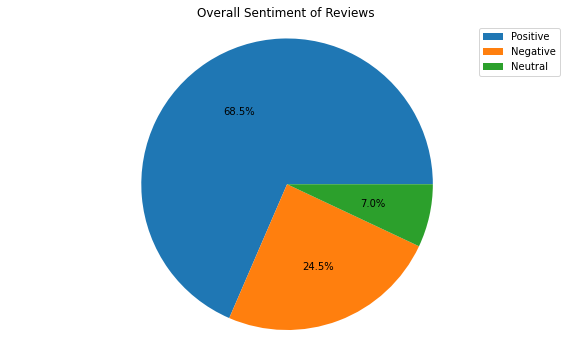

In [ ]:
#DATA VISUALIZATION 
x=rev2['sentiment'].value_counts()
x=list(x)
list1=['Positive', 'Negative', 'Neutral']
plt.rcParams["figure.figsize"] = (10,6)
plt.pie(x, autopct='%0.1f%%')
plt.axis('equal')
plt.legend(list1, loc=1)
plt.title('Overall Sentiment of Reviews')
plt.show()


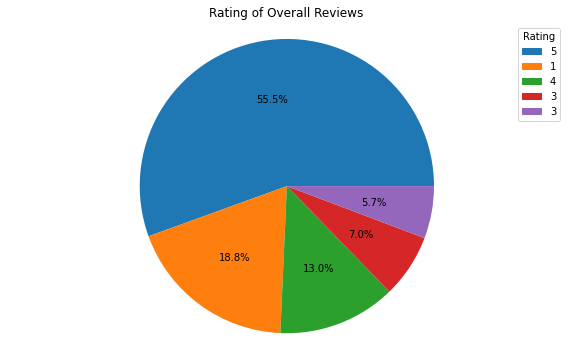

In [ ]:
x2=rev['rating'].value_counts()
x2=list(x2)
list2=['5','1', '4', '3', '3']
plt.rcParams["figure.figsize"] = (10,6)
plt.pie(x2, autopct='%0.1f%%')
plt.axis('equal')
plt.legend(list2,title='Rating', loc=1)
plt.title('Rating of Overall Reviews')
plt.show()

In [ ]:
rev['year'] = pd.DatetimeIndex(rev['date']).year
x3=rev['year'].value_counts()

In [ ]:
print(x3)

2019    29600
2018    13677
2017     8170
2016     5485
2015     4455
2014     3320
2013     2149
2012      724
2011      102
2010       54
2009       36
2008        6
2007        5
2006        2
2005        1
Name: year, dtype: int64


In [ ]:
brand = items['brand'].unique().tolist()
print(brand) 
totalrev=[]
for i in brand: 
  totalrev.append(sum(items[items['brand']==i].totalReviews))
  print(totalrev)



['Motorola', 'Nokia', 'Samsung', 'HUAWEI', 'Sony', 'Apple', 'Google', 'ASUS', 'OnePlus', 'Xiaomi']
[9419]
[9419, 6182]
[9419, 6182, 37701]
[9419, 6182, 37701, 2467]
[9419, 6182, 37701, 2467, 3312]
[9419, 6182, 37701, 2467, 3312, 6315]
[9419, 6182, 37701, 2467, 3312, 6315, 4238]
[9419, 6182, 37701, 2467, 3312, 6315, 4238, 263]
[9419, 6182, 37701, 2467, 3312, 6315, 4238, 263, 406]
[9419, 6182, 37701, 2467, 3312, 6315, 4238, 263, 406, 5574]


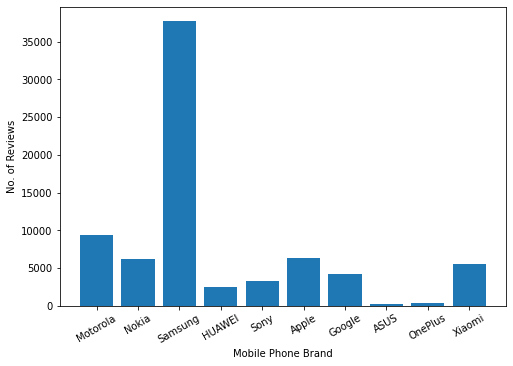

In [ ]:
plt.rcParams["figure.figsize"] = (8,5.5)
plt.bar(brand, totalrev)
ax=plt.subplot()
ax.set_xticklabels(brand, rotation=30)
plt.ylabel('No. of Reviews')
plt.xlabel('Mobile Phone Brand')
plt.show()

In [ ]:
newbrand=['Samsung', 'Motorola', 'Apple']

l1=[2013, 2014, 2015, 2016, 2017, 2018, 2019]
x5=[]
for i in newbrand: 
  x4=[]
  i2=items[items['brand']== i].asin.tolist()
  for j in l1: 
    iden = rev[rev['asin'].isin(i2)]
    x4.append(iden[iden['year']==j].rating.mean())
    #print(x4)
  x5.append(x4)
  #print(iden['rating'].isna())
  #print(x)
print(x5)



[[3.9339449541284406, 4.116049382716049, 4.04482594182165, 3.873644251626898, 3.5598159509202456, 3.481519658371374, 3.9090317860336556], [3.8146341463414632, 4.062755798090041, 4.064313725490196, 3.761596548004315, 3.550802139037433, 3.652139461172742, 3.8151913875598087], [nan, nan, 3.4210526315789473, 3.4, 3.711864406779661, 3.5927687916270217, 3.732253086419753]]


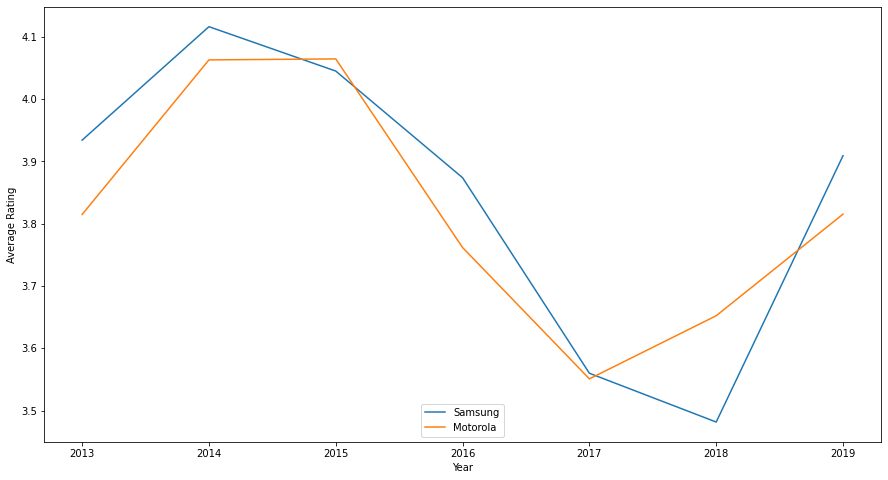

In [ ]:
plt.rcParams["figure.figsize"] = (15,8)
plt.plot(l1, x5[0])
plt.plot(l1, x5[1])
label_legends=['Samsung', 'Motorola']
plt.xlabel("Year")
plt.ylabel("Average Rating")
plt.legend(label_legends, loc=8)
plt.show()

In [ ]:
arr=[1,2,3,4,5]
arr2=['rating_1', 'rating_2', 'rating_3', 'rating_4', 'rating_5']
newdf=pd.DataFrame(arr2, columns=['rating'])
for i in brand: 
  x4=[]
  for j in arr: 
    i2=items[items['brand']== i].asin.tolist()
    iden = rev[rev['asin'].isin(i2)]
    x4.append(iden[iden['rating']==j].rating.count())
  newdf[i]=x4
  
print(newdf)

     rating  Motorola  Nokia  Samsung  HUAWEI  Sony  Apple  Google  ASUS  \
0  rating_1      1562   1253     6646     246   511   1191     883    41   
1  rating_2       542    457     1891      63   259    243     286    23   
2  rating_3       653    540     2292     124   280    322     267    25   
3  rating_4      1310    910     4128     268   496    545     435    38   
4  rating_5      4813   2755    18672    1524  1650   2844    1916   124   

   OnePlus  Xiaomi  
0       46     334  
1        6     126  
2       13     222  
3       45     615  
4      237    3114  


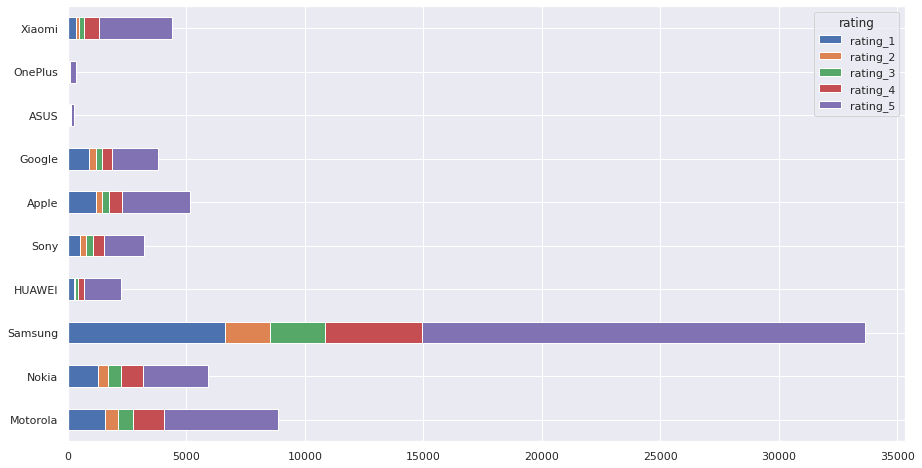

In [ ]:
import seaborn as sns
sns.set(rc = {'figure.figsize':(15,8)})
newdf.set_index("rating").T.plot(kind='barh', stacked=True)
plt.show()

In [ ]:
tempdf=pd.DataFrame(arr2, columns=['rating'])
x4=[]
for i in arr: 
  x4.append(len(rev[rev['rating']==i].body))
tempdf['revlength']=x4
print(tempdf)

     rating  revlength
0  rating_1      12713
1  rating_2       3896
2  rating_3       4738
3  rating_4       8790
4  rating_5      37649


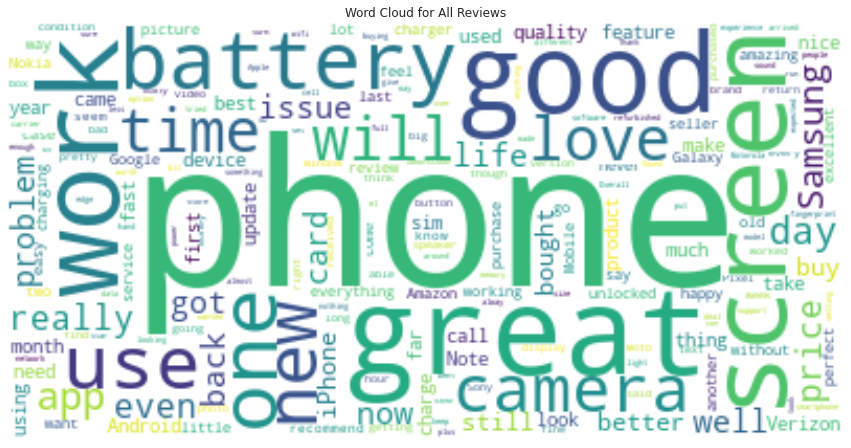

In [ ]:
from wordcloud import WordCloud
#overall reviews word cloud
text = " ".join(review for review in rev2.body)
word_cloud = WordCloud(collocations = False, background_color = 'white').generate(text)
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud for All Reviews")
plt.show()

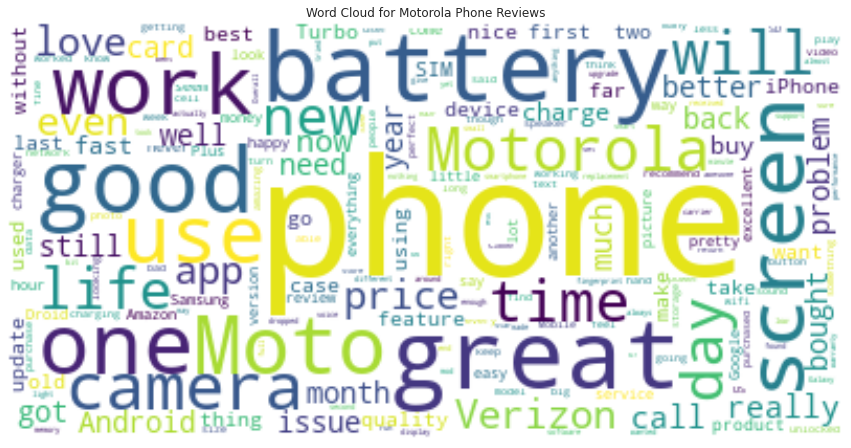

In [ ]:
#word cloud for samsung reviews

i2=items[items['brand']== 'Motorola'].asin.tolist()
iden = rev[rev['asin'].isin(i2)]
iden.dropna(inplace=True)
text = " ".join(review for review in iden.body)
word_cloud = WordCloud(collocations = False, background_color = 'white').generate(text)
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud for Motorola Phone Reviews")
plt.show()

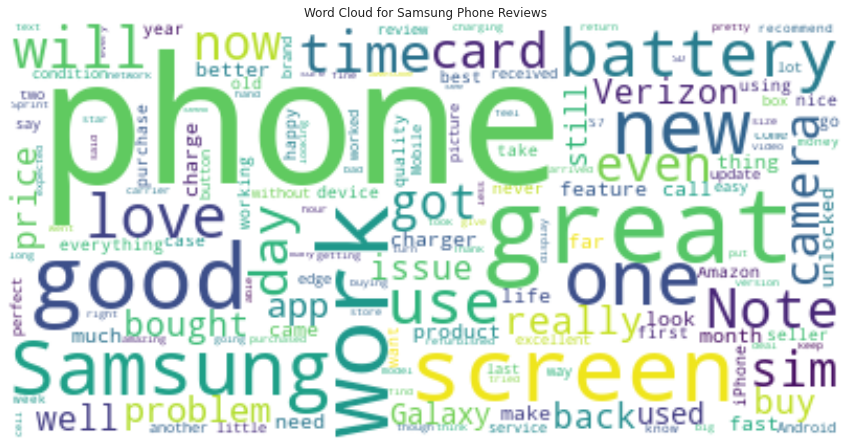

In [ ]:
i2=items[items['brand']== 'Samsung'].asin.tolist()
iden = rev[rev['asin'].isin(i2)]
iden.dropna(inplace=True)
text = " ".join(review for review in iden.body)
word_cloud = WordCloud(collocations = False, background_color = 'white').generate(text)
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud for Samsung Phone Reviews")
plt.show()

In [ ]:
#!pip install text2emotion
#import text2emotion as te

In [ ]:
#import nltk
#import re

#def emotions(x):
  #a=te.get_emotion(x)
  #b=max(zip(a.values(),a.keys()))[1]
  #return b
#rev2['emotions']=rev2['body'].apply(emotions)
#print(rev2.head())